<a href="https://www.kaggle.com/jasnoorkaur3107/jasnoor-kaur?scriptVersionId=90290675" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/voicegender/voice.csv


In [14]:
import cupy 
import cudf 

In [15]:
data1 = cudf.read_csv("../input/voicegender/voice.csv")

In [16]:
data1.head

<bound method Frame.head of       meanfreq        sd    median       Q25       Q75       IQR       skew  \
0     0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1     0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2     0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3     0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4     0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   
...        ...       ...       ...       ...       ...       ...        ...   
3163  0.131884  0.084734  0.153707  0.049285  0.201144  0.151859   1.762129   
3164  0.116221  0.089221  0.076758  0.042718  0.204911  0.162193   0.693730   
3165  0.142056  0.095798  0.183731  0.033424  0.224360  0.190936   1.876502   
3166  0.143659  0.090628  0.184976  0.043508  0.219943  0.176435   1.591065   
3167  0.165509  0.092884  0.183044  0.070072  0.250827  0.180756   1.705029   

             kurt    sp

In [17]:
data_set=cudf.DataFrame(data1)
data_set.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476563,0.208274,male


In [18]:
data1.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: uint64

In [19]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
meanfreq,3168.0,0.180907,0.029918,0.039363,0.163662,0.184838,0.199146,0.251124
sd,3168.0,0.057126,0.016652,0.018363,0.041954,0.059155,0.067020,0.115273
median,3168.0,0.185621,0.036360,0.010975,0.169593,0.190032,0.210618,0.261224
Q25,3168.0,0.140456,0.048680,0.000229,0.111087,0.140286,0.175939,0.247347
Q75,3168.0,0.224765,0.023639,0.042946,0.208747,0.225684,0.243660,0.273469
IQR,3168.0,0.084309,0.042783,0.014558,0.042560,0.094280,0.114175,0.252225
skew,3168.0,3.140168,4.240529,0.141735,1.649569,2.197101,2.931694,34.725453
kurt,3168.0,36.568461,134.928661,2.068455,5.669547,8.318463,13.648905,1309.612887
sp.ent,3168.0,0.895127,0.044980,0.738651,0.861811,0.901767,0.928713,0.981997
sfm,3168.0,0.408216,0.177521,0.036876,0.258041,0.396335,0.533676,0.842936


In [20]:
from cuml.preprocessing.LabelEncoder import LabelEncoder

le = LabelEncoder()

#le.fit(data1.label) 
#encoded = le.transform(data1.label)
data1['label']=le.fit_transform(data1['label'])
data1.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476563,0.208274,1


<AxesSubplot:>

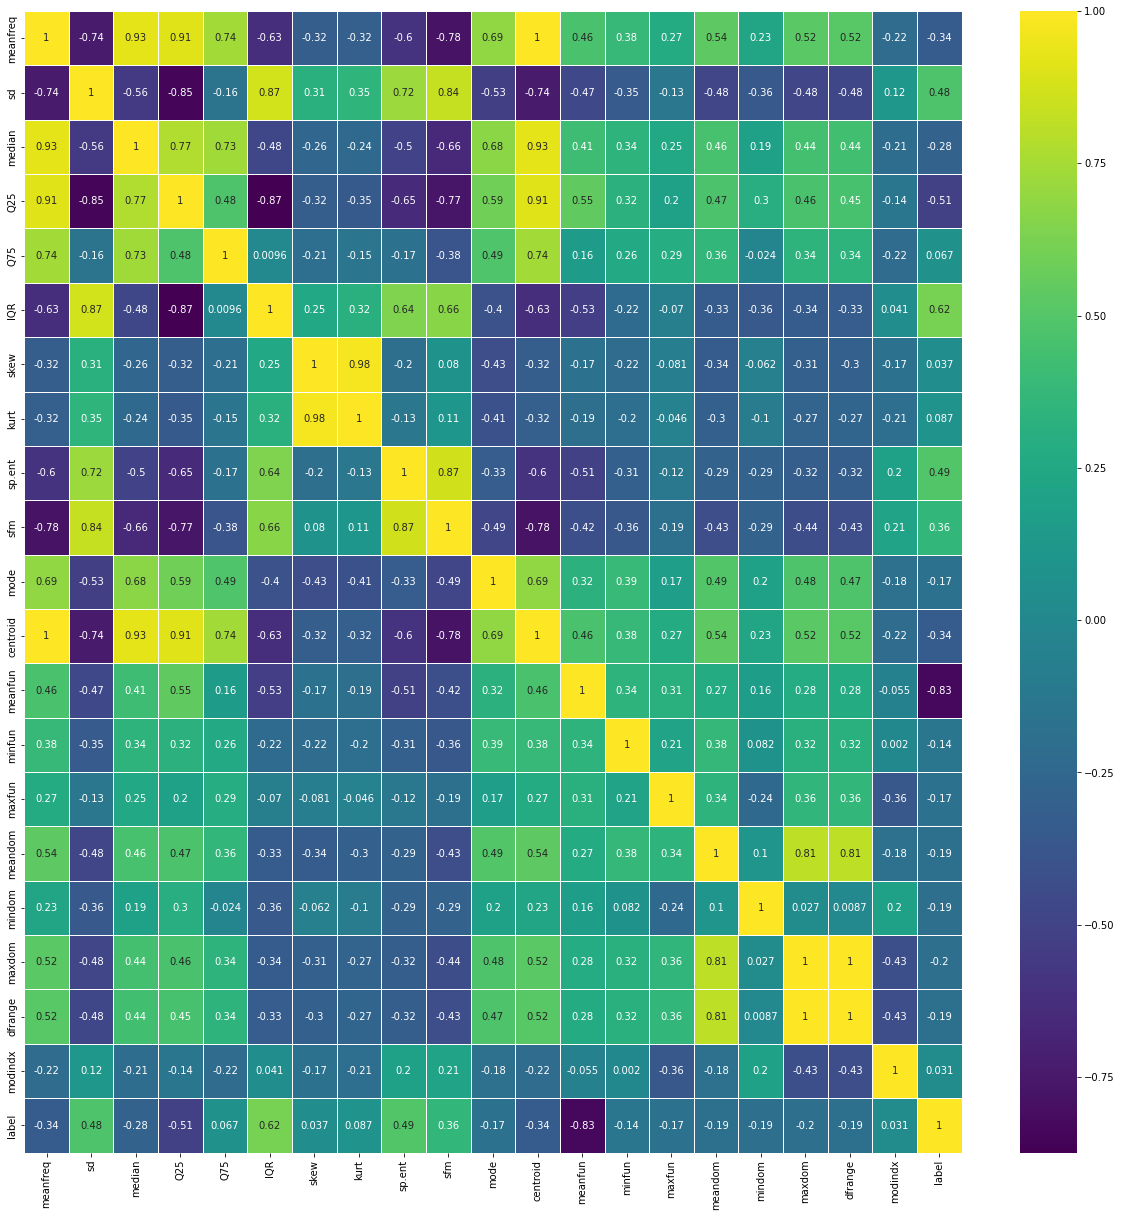

In [21]:
import seaborn
import matplotlib.pyplot as plt
plt.figure(figsize=(21,21))
data2= data1.to_pandas()
seaborn.heatmap(data2.corr(),annot=True,cmap='viridis',linewidth=0.5)

     |████████████████████████████████| 540 kB 598 kB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=9cff0446534aceaa59c3cbd097a00a2281d67add68f3faeb9c5ae2d9b461cc26
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


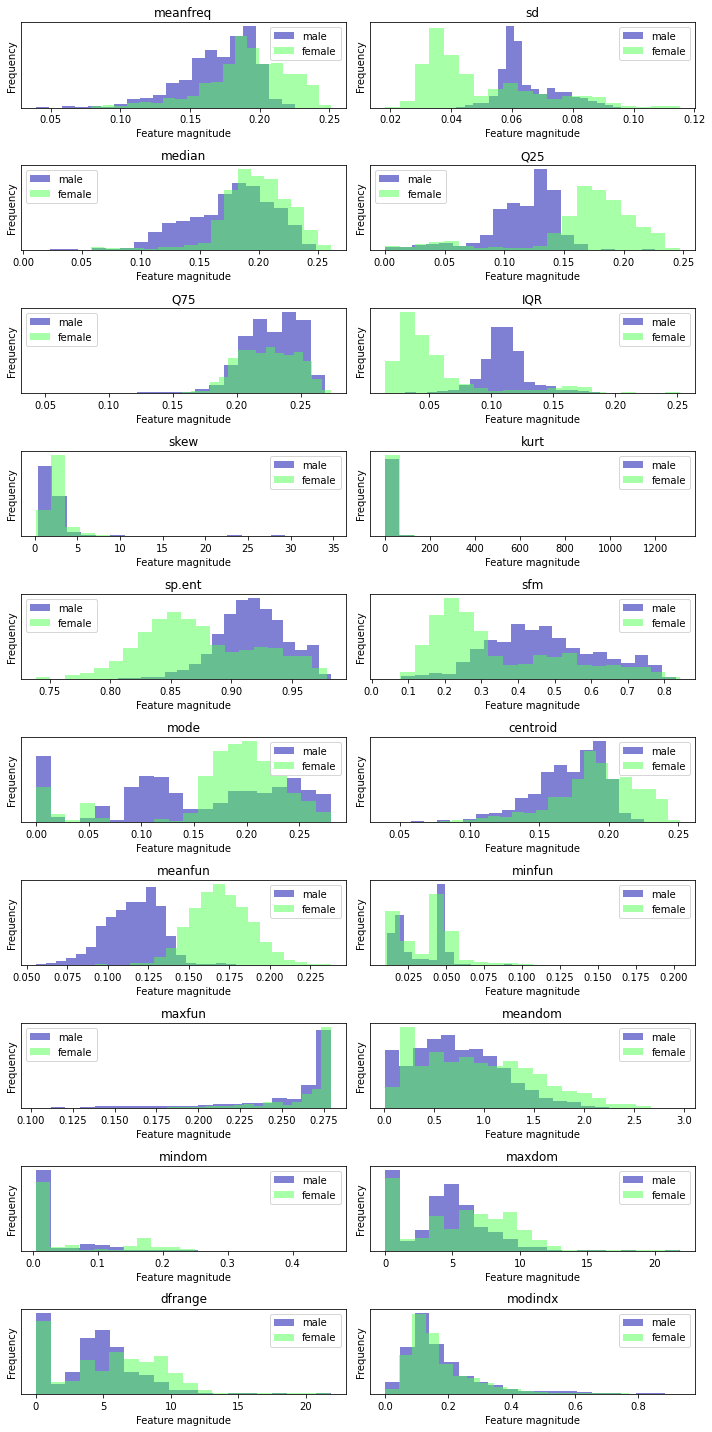

In [22]:
!pip install mglearn
import mglearn
gen = pd.read_csv('../input/voicegender/voice.csv')
gen_data = pd.DataFrame(gen)
gen_data.head()
male = gen.loc[gen['label']=='male']
female = gen.loc[gen['label']=='female']
fig, axes = plt.subplots(10, 2, figsize=(10,20))
ax = axes.ravel()
for i in range(20):
    ax[i].hist(male.iloc[:,i], bins=20, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(female.iloc[:, i], bins=20, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(list(male)[i])
    ax[i].set_yticks(())
    ax[i].set_xlabel("Feature magnitude")
    ax[i].set_ylabel("Frequency")
    ax[i].legend(["male", "female"], loc="best")

fig.tight_layout()

In [23]:
#from cuml.preprocessing.LabelEncoder import LabelEncoder
le = LabelEncoder()

#le.fit(data1.label) 
#encoded = le.transform(data1.label)
data_set['label']=le.fit_transform(data_set['label'])
data_set.head()
from cudf import DataFrame, Series
new_data_set = data_set.drop(['sfm','kurt','meandom','meanfreq','dfrange','modindx'],axis=1)
new_data_set.head()

,sd,median,Q25,Q75,IQR,skew,sp.ent,mode,centroid,meanfun,minfun,maxfun,mindom,maxdom,label
0,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,0.893369,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,1
1,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,0.892193,0.000000,0.066009,0.107937,0.015826,0.250000,0.007812,0.054688,1
2,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,0.846389,0.000000,0.077316,0.098706,0.015656,0.271186,0.007812,0.015625,1
3,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,0.963322,0.083878,0.151228,0.088965,0.017798,0.250000,0.007812,0.562500,1
4,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,0.971955,0.104261,0.135120,0.106398,0.016931,0.266667,0.007812,5.484375,1


<AxesSubplot:>

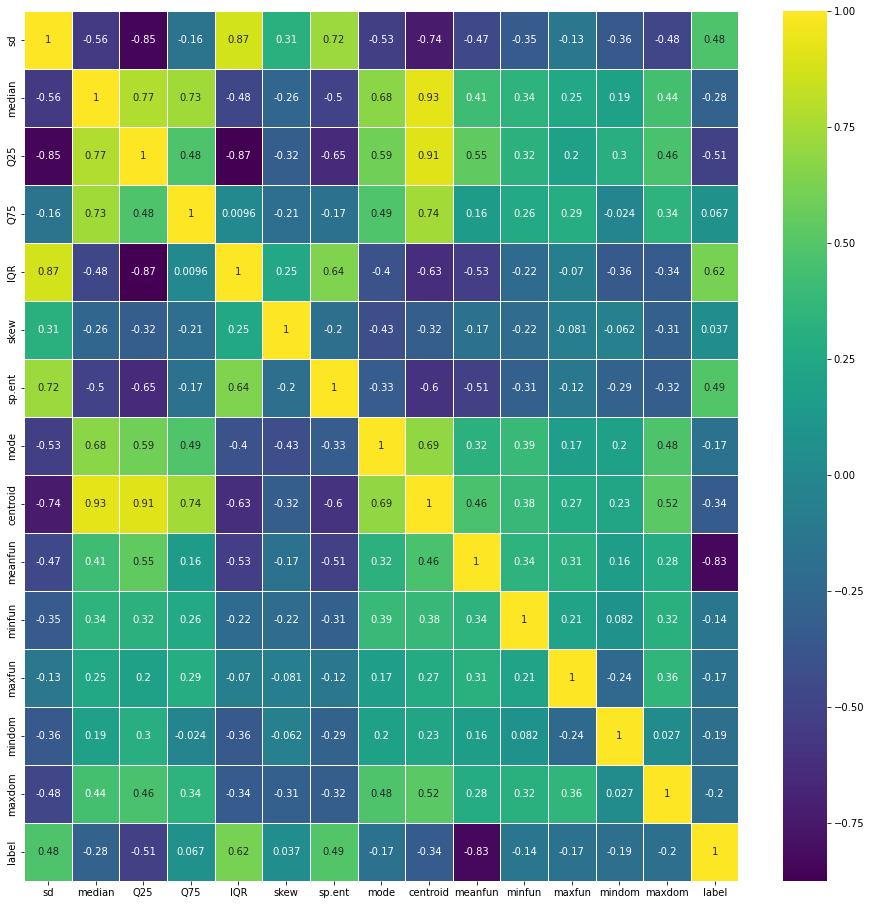

In [24]:
plt.figure(figsize=(16,16))
new_data_set1= new_data_set.to_pandas()


seaborn.heatmap(new_data_set1.corr(),annot=True,cmap='viridis',linewidth=0.5)

In [25]:
from cuml.model_selection import train_test_split
x= new_data_set.iloc[ : , : -1]
y= new_data_set.iloc[ : ,  -1]
X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2)

In [26]:
from cuml.neighbors import KNeighborsClassifier as cuKNeighbors
classifier1 = cuKNeighbors(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier1.fit(X_train, y_train)
print('Using K nearest Classifier:')
print('Accuracy of training set: {:.2f}'.format(classifier1.score(X_train,y_train)))
print('Accuracy of test set: {:.2f}'.format(classifier1.score(X_test,y_test)))

Using K nearest Classifier:
Accuracy of training set: 0.85
Accuracy of test set: 0.78


In [27]:
from cuml.svm import SVC as cuSVC

classifier2 = cuSVC(kernel = 'linear')
classifier2.fit(X_train, y_train)
print('Using SVM classifier:')
print('Accuracy of training set: {:.2f}'.format(classifier2.score(X_train,y_train)))
print('Accuracy of test set: {:.2f}'.format(classifier2.score(X_test,y_test)))

Using SVM classifier:
Accuracy of training set: 0.92
Accuracy of test set: 0.91


In [28]:
from cuml.naive_bayes import GaussianNB
classifier3 = GaussianNB()
classifier3.fit(X_train, y_train)
print('Using Naive Bayes classifier:')
print('Accuracy of training set: {:.2f}'.format(classifier3.score(X_train,y_train)))
print('Accuracy of test set: {:.2f}'.format(classifier3.score(X_test,y_test)))

Using Naive Bayes classifier:
Accuracy of training set: 0.93
Accuracy of test set: 0.92


In [29]:
from cuml.svm import SVC as cuSVC
classifier4 = cuSVC(kernel = 'linear')
classifier4.fit(X_train, y_train)
print('Using SVM classifier:')
print('Accuracy of training set: {:.2f}'.format(classifier4.score(X_train,y_train)))
print('Accuracy of test set: {:.2f}'.format(classifier4.score(X_test,y_test)))

Using SVM classifier:
Accuracy of training set: 0.92
Accuracy of test set: 0.91
